
## MINI Project: LOGISTIC REGRESSION and SVM -- North Carolina Education Data Set

** Austin Hancock, Shravan Kuchkula, Kevin Okiah, Damarcus Thomas **

### Introduction
* For this project will be using North Carolina Schools education data. The data is a combination of multiple data tables publicly available by the North Carolina Department of Public Instruction (NCDPI) which is charged with implementing the state's public school laws and the State Board of Education's policies and procedures governing pre-kindergarten through 12th grade public education. You can learn more about the data by visiting http://www.ncpublicschools.org/data/reports/

* Our starting datasets[All_Data_By_School_Final] and [1516_Test_Scores] were taken from Dr. Drews github where he combines multiple datasets from North Carolina Schools education data, preprocesses them and cleans for Machine learning. You can learn more on the data set from Dr.Drew's github https://github.com/jakemdrew/EducationDataNC.

* We performed Visualization on s usbset of the data targeted for schools with `high schools`, which can be accessed from https://github.com/kevimwe/NC_EDUCATION_DATA/tree/master/NC_EDUC_Visualization_Data_Processing.

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import required Libraries
import pandas as pd
import numpy as np

import os 
pd.set_option('display.max_colwidth', -1)
import requests
import io

# Import the stats library
from scipy import stats
import statsmodels.api as sm

# These are the plotting libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


# Command for plots to appear in the iPython Notebook
%matplotlib inline
#Starting with the dataset that Dr.Drew helped clean.->highschools saved to .cvs file from graduations rates (2) notebook
wd = os.getcwd() #get working directory

#Read in raw data

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/All_Data_By_School_Final.csv"
s=requests.get(url).content

schoolData=pd.read_csv(io.StringIO(s.decode('utf-8')))

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/1516_Test_Scores.csv"
t=requests.get(url).content

testScores=pd.read_csv(io.StringIO(t.decode('utf-8')))

#Review raw data before the join
schoolData.info()

#join files using school / unit code
schoolData = schoolData.join(testScores, on='unit_code',how='left', lsuffix='_schoolData', rsuffix='_testScores')
#highschools = pd.read_csv(wd+'/data/highschools.csv', low_memory=False)
#highschools = pd.read_csv(wd+'\\data\\highschools.csv', low_memory=False)
schoolData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 305 entries, Year to Percent GLP
dtypes: float64(262), int64(17), object(26)
memory usage: 6.0+ MB


### Data Meaning Type 

In [3]:
url = 'https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/DataMeaningType.csv'

s=requests.get(url).content
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_colwidth', 150)
pd.read_csv(io.StringIO(s.decode('utf-8')))


,Attribute,Meaning,Type
0,unit_code,Code to identify School/LEA/State,Object
1,type_cd_txt,Type of school (Chater or Public),Object
2,category_cd,"Category of School (E, M, H, I, T, or A)",Object
3,school_type_txt,Description of School type,Object
4,calendar_only_txt,Description of Calendar (Traditional or Year-Round),object
5,title1_type_flg,Title I Status,bool
6,clp_ind_flg,Consistently low performing school,bool
7,focus_clp_flg,Focus school designation based on CLP,bool
8,summer_program_flg,Summer school program included in Read to Achieve results,bool
9,asm_no_spg_flg,No School Performance Grade due to alternative school status,bool


#### Data Dictionary
> Since this datasets has numerous columns we needed a fast way to quickly find ColumnName description for easy reference. For exceptional work, we created a function to quickly pull the data from csv datafile. This involved converting the pdf to excel and formating the data for easy import into pandas. The code below is a working code for our data dictionary.

In [278]:

DataDict=pd.read_csv(io.StringIO(s.decode('utf-8')))

DataDict.head()
#DataDict = DataDict.columns['COLUMN_NAME', 'DESCRIPTION']
def get_ColDescription(colname = 'Year'):
    colName = input("Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: ")
    
    print('You entered: ', colName.strip())
    temp = pd.DataFrame()
    colNames = colName.split(',')
    
    try:
        for i in range(0,len(colNames)):
            get = (DataDict[DataDict.Attribute==colNames[i].strip().lower()])
            temp = temp.append(get)
        return(temp)
    except Exception as e:
        print(e.args) 

get_ColDescription()

Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: 
You entered:  


,Attribute,Meaning,Type


### Data Quality

##### *Missing Data Statistics*

> In this section we explore missing data in the highschool data that was created from the original north carolina data. After exploring the missing data we will discusss the approach for handling them.

In [4]:
schoolData['title1_type_flg'] = schoolData['title1_type_flg'].map({-1:True, 0:False})
schoolData['clp_ind_flg'] = schoolData['clp_ind_flg'].map({-1:True, 0:False})
schoolData['focus_clp_flg'] = schoolData['focus_clp_flg'].map({-1:True, 0:False})
schoolData['summer_program_flg'] = schoolData['summer_program_flg'].map({-1:True, 0:False})
schoolData['asm_no_spg_flg'] = schoolData['asm_no_spg_flg'].map({-1:True, 0:False})
schoolData['no_data_spg_flg'] = schoolData['no_data_spg_flg'].map({-1:True, 0:False})
schoolData['stem_flg'] = schoolData['stem_flg'].map({-1:True, 0:False})
schoolData = schoolData.drop(['street_ad'], axis=1)

In [5]:
#Check for missing values
Temp = pd.DataFrame(schoolData.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with atleast 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic starts on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No of rows in schoolData: ',len(schoolData))
print('No of Columns in schoolData: ',len(schoolData.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No  of Complete data columns: ', len(schoolData.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))
print('No. of Columns more than 95% missing Values: ',sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(schoolData.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))/len(schoolData.columns),3),'%')
print('% of Columns with more than 95% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))/len(schoolData.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with >95% missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(schoolData))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(50)))

##################################################
###              Stats on missing data         ###
##################################################
No of rows in schoolData:  2579
No of Columns in schoolData:  304
No. of Columns with Missing data:  228
No  of Complete data columns:  76
No. of Columns with 100% missing Values:  32
No. of Columns more than 95% missing Values:  39
% of Columns with some Missing data:  75.0 %
% of Columns with 100% Missing data:  10.526 %
% of Columns with more than 95% Missing data:  12.829 %
 
##################################################
###        Columns with >95% missing data      ###
##################################################
    DataMissing                ColumnName   Missing %
0          2579               Percent GLP  100.000000
1          2579            prin_other_pct  100.000000
2          2579           Percent Level 5  100.000000
3          2579         GCE_RPF_State_Pct  100.000000
4          2579           Percent Level 3

> From above we note, of the 305 columns in SchoolData, 228 (74.8%) of them have some missing data. 32(10.5%) of columns have all the data missing where 39 (12.8%) of the columns miss more than 95% of the data. For columns with 100% missing data we are left but to wonder if this were new fields introduced recently and the schools are not fully informed to collect this data or the data for this columns was not just collected by mistake. On the other hand, for the partally completed datasets, some schools might have left these columns blank if they didn't apply to them.

> For the sake of this analysis we will drop the columns that have `>95` missing data rather than try complete the missing data with either mean, median or mode. If we complete this large amount of missing rows of data with predetermined data, our model maybe baised and throw were predictions off.

In [6]:
#All columns from Original schoolData
AllColumns =schoolData.columns 

# All columns with some missing value
ColumnsWithMissingdata = MissingCount.ColumnName 

#columns with more than 95% missing data
Columns2Drop = MissingCount.ColumnName.head(38) 

#columns with missing values that are kept
Columns2Keep = MissingCount.ColumnName.tail(len(MissingCount)-99) 

#All the other columns except those with >95% missing data
SelectedColumns = list(set(AllColumns)-set(Columns2Drop)) 

#new dataset, columns with >95% missing data dropped

schoolDataNew = schoolData[SelectedColumns]

#drop the key column. 
del schoolDataNew['unit_code']

print("##################################################")
print("###", '          Orginal Highschooldata info     ',  "###")
print("##################################################")
print(schoolData.info())
print("##################################################")
print("###", '  Columns with >95 data missing   dropped ',  "###")
print("##################################################")
print(schoolDataNew.info())
schoolDataNew.head(5)


##################################################
###           Orginal Highschooldata info      ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 304 entries, Year to Percent GLP
dtypes: bool(7), float64(262), int64(10), object(25)
memory usage: 5.9+ MB
None
##################################################
###   Columns with >95 data missing   dropped  ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 265 entries, State Gap Compared to lea_highqual_class_all_pct
dtypes: bool(7), float64(229), int64(10), object(19)
memory usage: 5.1+ MB
None


,State Gap Compared,st_prin_white_pct,long_susp_per_c_num,GCE_ALL_State_Pct,st_not_highqual_class_all_pct,Avg_Class_Size_00,Dist_Prin_Exp_Pct_4_10_Years,lea_avg_daily_attend_pct,st_prinyrs_0thru3_pct,State_Prin_Exp_Pct_10+_Years,...,lea_instruct_equip_exp_pct,lea_not_highqual_class_lp_pct,lea_highqual_class_pct,st_stud_internet_comp_num,lea_other_expense_pct,st_tchyrs_4thru10_pct,lea_class_teach_num,st_expelled_per_c_num,tchyrs_4thru10_pct,lea_highqual_class_all_pct
0,NaN,0.737,0.0,0.112,0.037,20.0,NaN,NaN,0.43,0.143,...,NaN,NaN,NaN,1.2,NaN,0.226,NaN,0,NaN,NaN
1,NaN,0.737,0.0,0.112,0.037,24.0,NaN,NaN,0.43,0.143,...,NaN,NaN,NaN,1.2,NaN,0.254,NaN,0,NaN,NaN
2,NaN,0.737,0.0,NaN,0.037,NaN,0.417,0.941,0.43,0.143,...,0.009,0.086,0.889,1.2,0.0,0.235,54.0,0,0.286,0.94
3,NaN,0.737,0.0,0.112,0.037,18.0,0.417,0.944,0.43,0.143,...,0.009,0.086,0.988,1.2,0.0,0.273,38.0,0,0.333,0.94
4,NaN,0.737,0.0,0.112,0.037,18.0,0.417,0.944,0.43,0.143,...,0.009,0.086,0.988,1.2,0.0,0.273,38.0,0,0.147,0.94


> In the code block above, we drop 38 columns which have >95% of the data missing. We also delete the unit_code column which is a key to identify the school/Lea/state. 

In [7]:
#Exploring the columns with missing dataset that are retained
df = schoolDataNew
temp_df = df.copy() 
print("##################################################")
temp  = df.select_dtypes(include=['int','float'])
temp2  = df.select_dtypes(include=['object', 'bool'])
print("#      Columns with continious data (int, float) #")
print("##################################################")
temp.info()
print(" ")
print("##########################################")
print("#     Columns with Categorical data      #")
print("##########################################")
temp2.info()
print(" ")
print("Total # of columns: ",len(schoolDataNew.columns))

##################################################
#      Columns with continious data (int, float) #
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 239 entries, st_prin_white_pct to lea_highqual_class_all_pct
dtypes: float64(229), int64(10)
memory usage: 4.7 MB
 
##########################################
#     Columns with Categorical data      #
##########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 26 columns):
State Gap Compared      153 non-null object
esea_status             201 non-null object
grades_1_to_1_access    2313 non-null object
title1_type_flg         2579 non-null bool
Byod                    2313 non-null object
category_cd             2579 non-null object
scity_ad                2579 non-null object
type_cd_txt             2579 non-null object
clp_ind_flg             2579 non-null bool
state_ad     

> In the code block above we explore the columns with missing data that we retained. we group the columns into two based on data type as we will have two different approaches for replacing the missing data;
1. #### Columns with continuous data types (ints and floats)
Of the 129 columns retained with missing data, 120 are of dtype float64. After reviewing individual columns description from the data dictionary, we choose to replace these missing float types with median. We didn't go with mean simply because with existance of outliers, mean would be screwed compared to median.
2. #### Columns with contegorical data types (objects and bool)
For the 9 categorical columns, we will be replacing the missing values with mode.

In [8]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df = schoolDataNew):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #categorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()[0]))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

new_schooldata = ReplaceMissingdata(schoolDataNew)    

new_schooldata.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
State Gap Compared                                2426
st_prin_white_pct                                    0
long_susp_per_c_num                                  7
GCE_ALL_State_Pct                                 1120
st_not_highqual_class_all_pct                        0
Avg_Class_Size_00                                 1185
Dist_Prin_Exp_Pct_4_10_Years                       160
lea_avg_daily_attend_pct                           160
st_prinyrs_0thru3_pct                                0
State_Prin_Exp_Pct_10+_Years                         0
sch_percent_college_enrolled_16_mos_post_grad     2034
st_1yr_prin_trnovr_pct                               0
st_highqual_class_hp_pct                             0
Avg_Class_Size_EnglishII                          1983
Avg_Dist_Size_0

> In the code block above, we replaced missing catagorical values with mode and missing continuous values with median. A total of 129 columns with missing values have been cleaned

In [9]:
new_schooldata.shape

(2579, 265)

category_cd
A      63
E    1320
H     505
I     142
M     478
T      71
dtype: int64

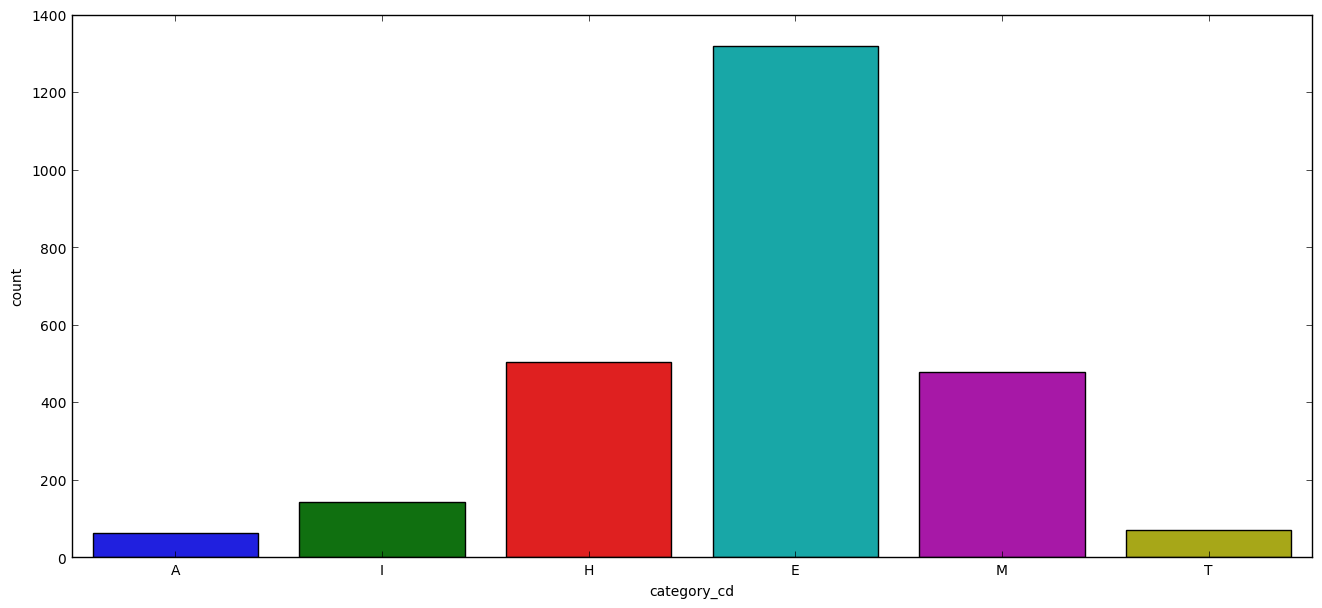

In [10]:
# School Category Factor plot 
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("category_cd",data=new_schooldata)
new_schooldata.groupby(["category_cd"]).size()

>  The bar graph above is shows the distribution of different school categories in state of North Carolina. See summary table below for school category descriptions and % distribution

Category | Description|Count |Percentage
--- | --- | ---|---
A | School has elementary, middle, and high school grades  | 63|2.44%
E | School has elementary schools grades (PK-5) | 1320|51.18%
H | School has high schools grades (9-13)  | 505|19.58%
I | Schools with elementary, middle and high school grades | 142|5.51%
M | School has middle schools grades (6-8)  | 478|18.53%
T | School has middle and high school grades | 71|2.75%

### New Features

In [11]:
#1
#################################################
#               New Features                    #
#################################################
# create Factors for 'Overall Achievement Score'
# A: 85-100
# B: 70-84
# C: 55-69
# D: 40-54
# F:<40
new_schooldata = new_schooldata.assign(Overall_Achievement_Score_bins = pd.cut(np.array(new_schooldata['Overall Achievement Score']), 
                                              5, labels=["<40", "40-54", "55-69",'70-84',"85-100"]))
#2
#SchoolWeightedScore:  Summation of all achievement measures Scores.
bin1 = ['EVAAS Growth Score','Overall Achievement Score' ] # Weight 0.6
bin2 = ['The ACT Score','ACT WorkKeys Score' ,'Math Course Rigor Score'] # weight 0.3
bin3 = ['Math I Score', 'English II Score','Biology Score'] # EOC scores weight 0.1
#print(Achievement_measures)
new_schooldata = new_schooldata.assign(BIN1=new_schooldata[bin1].sum(axis=1)*.6)
new_schooldata = new_schooldata.assign(BIN2=new_schooldata[bin2].sum(axis=1)*.3)
new_schooldata = new_schooldata.assign(BIN3=new_schooldata[bin3].sum(axis=1)*.1)
groupedbins = ['BIN1','BIN2','BIN3']
new_schooldata = new_schooldata.assign(SchoolWeightedScore = new_schooldata[groupedbins].sum(axis =1))


School_Final = new_schooldata.drop(groupedbins, 1)
School_Final.T


,0,1,2,3,4,5,6,7,8,9,...,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578
State Gap Compared,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,...,N,Y,Y,Y,Y,Y,Y,Y,Y,Y
st_prin_white_pct,0.737,0.737,0.737,0.737,0.737,0.737,0.737,0.737,0.737,0.737,...,0.737,0.737,0.737,0.737,0.737,0.737,0.737,0.737,0.737,0.737
long_susp_per_c_num,0,0,0,0,0,0.13,0,0,0,0,...,0,1.14,0,0,0,0,0,0,0,0
GCE_ALL_State_Pct,0.112,0.112,0.112,0.112,0.112,0.112,0.112,0.112,0.112,0.112,...,0.112,0.112,0.112,0.112,0.112,0.112,0.112,0.112,0.112,0.112
st_not_highqual_class_all_pct,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,...,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037
Avg_Class_Size_00,20,24,19,18,18,19,19,17,17,19,...,18,19,12,19,21,20,17,19,27,22
Dist_Prin_Exp_Pct_4_10_Years,0.442,0.442,0.417,0.417,0.417,0.417,0.417,0.417,0.417,0.417,...,0.442,0.442,0.442,0.442,0.442,0.442,0.442,0.442,0.442,0.442
lea_avg_daily_attend_pct,0.951,0.951,0.941,0.944,0.944,0.944,0.941,0.944,0.944,0.941,...,0.951,0.951,0.951,0.951,0.951,0.951,0.951,0.951,0.951,0.951
st_prinyrs_0thru3_pct,0.43,0.43,0.43,0.43,0.43,0.43,0.43,0.43,0.43,0.43,...,0.43,0.43,0.43,0.43,0.43,0.43,0.43,0.43,0.43,0.43
State_Prin_Exp_Pct_10+_Years,0.143,0.143,0.143,0.143,0.143,0.143,0.143,0.143,0.143,0.143,...,0.143,0.143,0.143,0.143,0.143,0.143,0.143,0.143,0.143,0.143


> From above code, we have created two new features from our dataset.

> 1. Overall_Achievement_Score_bins:
this is to groub the Overall Achievement Score into bins 
A: 85-100,
B: 70-84,
C: 55-69,
D: 40-54,
F:<40
> 2. SchoolWeightedScore: Summation of all achievement measures Scores.`EVAAS Growth Score` and `Overall Achievement Score` are put on bin1 and given a  weight 0.6 of the overall weighted school school.`The ACT Score`, `ACT WorkKeys Score` , and `Math Course Rigor Score` are put in bin 2 carrying a weight of 0.3 while bin3 contains End of Course scores for `Math I Score`, `English II Score`, and `Biology Score` given a weight 0.1. When we get to lab two, we will use this features to see if they improve our model performance.


### moving forward we will use this data with the new created features for modeling

In [12]:
modelingdata=School_Final.copy()
modelingdata.head()

,State Gap Compared,st_prin_white_pct,long_susp_per_c_num,GCE_ALL_State_Pct,st_not_highqual_class_all_pct,Avg_Class_Size_00,Dist_Prin_Exp_Pct_4_10_Years,lea_avg_daily_attend_pct,st_prinyrs_0thru3_pct,State_Prin_Exp_Pct_10+_Years,...,lea_highqual_class_pct,st_stud_internet_comp_num,lea_other_expense_pct,st_tchyrs_4thru10_pct,lea_class_teach_num,st_expelled_per_c_num,tchyrs_4thru10_pct,lea_highqual_class_all_pct,Overall_Achievement_Score_bins,SchoolWeightedScore
0,Y,0.737,0.0,0.112,0.037,20.0,0.442,0.951,0.43,0.143,...,0.986,1.2,0.0,0.226,37.0,0,0.250,0.981,55-69,173.07
1,Y,0.737,0.0,0.112,0.037,24.0,0.442,0.951,0.43,0.143,...,0.986,1.2,0.0,0.254,37.0,0,0.250,0.981,55-69,173.07
2,Y,0.737,0.0,0.112,0.037,19.0,0.417,0.941,0.43,0.143,...,0.889,1.2,0.0,0.235,54.0,0,0.286,0.940,55-69,173.07
3,Y,0.737,0.0,0.112,0.037,18.0,0.417,0.944,0.43,0.143,...,0.988,1.2,0.0,0.273,38.0,0,0.333,0.940,55-69,173.07
4,Y,0.737,0.0,0.112,0.037,18.0,0.417,0.944,0.43,0.143,...,0.988,1.2,0.0,0.273,38.0,0,0.147,0.940,55-69,173.07


In [13]:
modelingdata.shape

(2579, 267)

> # LOGISTIC REGRESSION and SUPPORT VECTOR MACHINE

### SECTION 1  [50 Points ]: 
1. Create a logistic regression model and a support vector machine model for the classification task involved with your dataset.

2. Assess how well each model performs (use 80/20 training/testing split for your data). 
3. Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. 
4. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

### Data Preparation for Classification

#### summer_program_flg  Classification

For this Classification exercise (Logistic regression and SVM) modeling we have choosen to builds models to predict if a school has a summer program  or not which is depicted by the boolean attribute `summer_program_flg` based on all the other features of the North Carolina Education data. In the code block below we create two dataset, the observed data X and an external variable y.

In [14]:
%%time
#Create data = x
df_X = modelingdata.copy()
#create target = Y
df_y = df_X.summer_program_flg
print('X shape before ')
print(df_X.shape)
#drop the response column from the x dataset
df_X.pop('summer_program_flg')
print('X shape after ')
print(df_X.shape)
print('Y shape after ')
print(df_y.shape)



X shape before 
(2579, 267)
X shape after 
(2579, 266)
Y shape after 
(2579,)
CPU times: user 10.3 ms, sys: 3.27 ms, total: 13.5 ms
Wall time: 9.95 ms


> in above code, we split that data into X and y for modeling

#### RUN CORRELATION to get the highly correlated columns to eliminnate
To improve the perfomance of our logistics regression model, we begin by running a correlation matrix on our X dataset to identify Multicollinearity of predictors and eliminate the highly correlated predictors.

In [15]:
#finding a list of the most correlated features


temp  = df_X.select_dtypes(include=['int','float']) # select int to run corr on
catcols  = df_X.select_dtypes(include=['object', 'bool']) #category columns
#print(catcols)
print(' before running correlation')
print(df_X.shape)
c = temp.corr()#.abs()
s =pd.DataFrame(c.unstack())
#print(s)
#so = s.order(kind="quicksort")
s['Correlation Pair'] = s.index
s = s.reset_index()
#del s['index']
s.columns = ['Column1', 'Column2', 'correlation','Correlation Pair']
result = s.sort_values('correlation', ascending=0)

#filter to correlation between range
#keepnew =  result[result.Column1 == result.Column2]
result1 =  result[((result.correlation <= 0.95))]

#result1
#combine the columns into a list
col= pd.DataFrame(result1.Column1)
col.columns = ['Columns']
col1 =pd.DataFrame(result1.Column2)
col1.columns = ['Columns']
df = col.append(col1)
#df = df.append(catcols)



#find only unique columns
UniqueColumns =pd.unique(df.Columns)

df_X_temp = df_X[UniqueColumns]

df_X =  pd.concat([df_X_temp, catcols], axis=1)

#shape on the new df_X
df_X.reset_index()
df_y.reset_index()
##print('X df after running correlation')
print(df_X.shape)
#print(cols)
##plt.matshow(c)

 before running correlation
(2579, 266)
(2579, 242)


#### In the code block above we find the run correlation on the X df to identify the most strongly correlated features >0.95 and remove them.  44 features are eliminated for being highly correlated thus redundant.

### Dropping columns that don't have unique values

In [16]:
## Count unique per columns
#Inspect the high school data fields 
df_X_temp = df_X.copy()
df_X_temp = df_X_temp.describe(include='all').T
# include the data type of the column in the dataframe
df_X_temp['type']= df_X.dtypes
# Reset the index of the dataframe to have index as numbers to have the number of rows visible in the output
df_X_temp.reset_index(inplace=True)
df_X_temp.rename(columns={'index': 'column_name'}, inplace=True)
x= {}
#count unique values per column
for i in df_X.columns:
    #print(i,len(pd.unique(df_X[i])))
    index=i
    unique = len(pd.unique(df_X[i]))
    x.update({index: unique})
temp =pd.DataFrame(list(x.items()), columns=['column_name', 'Unique'])

#merge the two dataframe on column name
df_X_temp = df_X_temp.merge(temp, on='column_name')

# Select columns where unique value is 1
temp1 = df_X_temp[df_X_temp['Unique']==1]

#df_X = df_X.drop(temp1['column_name'], axis =1)

print('###columns to be dropped ####')
df_X.drop( temp1['column_name'], axis=1, inplace=True)
print(temp1['column_name'])



###columns to be dropped ####
173               PROMOTED_State_Pct
174     st_total_specialized_courses
175                 st_prin_male_pct
176                st_prin_other_pct
177             PASSED_LAA_State_Pct
178             st_books_per_student
179          st_services_expense_pct
180           st_prinyrs_4thru10_pct
181    State_Prin_Exp_Pct_4_10_Years
182                   st_cte_courses
183        st_highqual_class_all_pct
184                st_prin_black_pct
185               st_prin_female_pct
186     st_not_highqual_class_lp_pct
187    st_not_highqual_class_all_pct
188            st_local_perpupil_num
189         st_highqual_class_lp_pct
190     st_not_highqual_class_hp_pct
191               RETAINED_State_Pct
192         st_sat_participation_pct
193                st_prin_white_pct
194        st_instruct_equip_exp_pct
195            st_prinyrs_11plus_pct
196     State_Prin_Exp_Pct_10+_Years
197                GCE_SWD_State_Pct
198        nat_sat_participation_pct
199     

In [17]:
print('New Shape')
df_X.shape

New Shape


(2579, 195)

Summer_program_flg
Counter({False: 1702, True: 877})


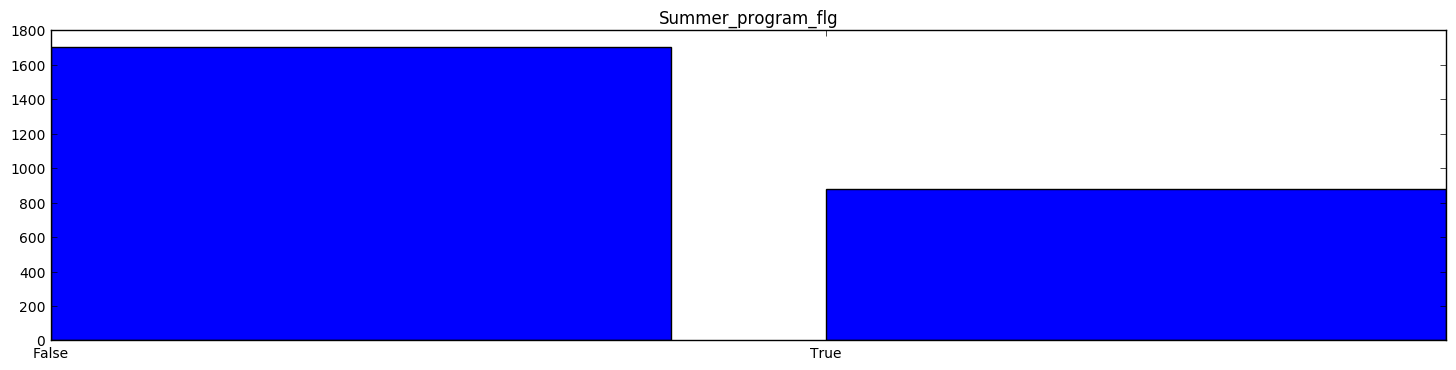

CPU times: user 388 ms, sys: 21.2 ms, total: 410 ms
Wall time: 429 ms


In [18]:
%%time
import collections
import matplotlib.pyplot as plt
a = df_y
data=collections.Counter(a)
print('Summer_program_flg')
print(data)

names = list(data.keys())
values = list(data.values())
plt.figure(figsize = (18,4))
plt.title('Summer_program_flg')
plt.bar(range(len(data)),values,tick_label=names)

#plt.savefig('bar.png')
plt.show()

The spread of the summer_program_flag is good  for classification with 1720 samples for false and 877 for true as shown in the bar chart above though Skewed more to the false (0) flag.

In [19]:
df_X.head()

,st_tchyrs_4thru10_pct,st_flicensed_teach_pct,State_Tch_Exp_Pct_4_10_Years,local_perpupil_num,total_expense_num,st_nbpts_num,st_long_susp_per_c_num,st_class_teach_num,st_avg_student_num,Reading SPG Score,...,school_type_txt,asm_no_spg_flg,1_to_1_access,grades_BYOD,focus_clp_flg,calendar_only_txt,EVAAS Growth Status,stem_flg,SPG Grade,no_data_spg_flg
0,0.226,0.808,0.226,2871.810,8297.25,2,0.06,36,511,60.0,...,Regular School,False,No,-,False,Traditional Calendar,Met,False,C,False
1,0.254,0.895,0.254,2453.720,7955.28,5,0.06,32,475,60.0,...,Regular School,False,No,-,False,Traditional Calendar,Met,False,C,False
2,0.235,0.897,0.235,2423.365,8358.47,8,0.07,54,860,60.0,...,Regular School,False,No,-,False,Traditional Calendar,Met,False,C,False
3,0.273,0.975,0.273,2423.365,8358.47,5,0.06,34,493,60.0,...,Regular School,False,No,-,False,Traditional Calendar,Met,False,C,False
4,0.273,0.975,0.273,2423.365,8358.47,5,0.06,34,493,60.0,...,Regular School,False,No,-,False,Traditional Calendar,Met,False,C,False


In [20]:
df_X.shape

(2579, 195)

In [21]:
%%time
def dummy_Create(df):
    schoolDataFinal = df.copy()
    SchoolDataCat = schoolDataFinal.loc[:,(schoolDataFinal.dtypes == bool)| (schoolDataFinal.dtypes == object) |(schoolDataFinal.dtypes == 'category')]#.columnscategory
    
    # drop the two street address columns
    print(SchoolDataCat.columns)
    cat_vars=SchoolDataCat.columns
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(schoolDataFinal[var], prefix=var)
        df=pd.concat([df,cat_list], axis=1)
    data=df
    cat_vars=SchoolDataCat.columns
    data_vars=data.columns.values.tolist()
    
    to_keep=[i for i in data_vars if i not in cat_vars]

    ## Final data columns
    data_final=data[to_keep]
    data_final.columns.values
    data_final_vars=data_final.columns.values.tolist()
    #return(SchoolDataCat)
    y=['summer_program_flg']
    X=[i for i in data_final_vars if i not in y]
 
    list(data_final_vars)
    print(y)
    #print(X)
    SchoolDataCat.describe().T
    return(data_final.abs())
    
df_X_new = dummy_Create(df_X)


Index(['State Gap Compared', 'esea_status', 'grades_1_to_1_access',
       'title1_type_flg', 'Byod', 'category_cd', 'scity_ad', 'type_cd_txt',
       'clp_ind_flg', 'Grad_project_status', 'Math SPG Grade',
       'Reading SPG Grade', 'school_type_txt', 'asm_no_spg_flg',
       '1_to_1_access', 'grades_BYOD', 'focus_clp_flg', 'calendar_only_txt',
       'EVAAS Growth Status', 'stem_flg', 'SPG Grade', 'no_data_spg_flg'],
      dtype='object')
['summer_program_flg']
CPU times: user 417 ms, sys: 74.7 ms, total: 492 ms
Wall time: 510 ms


> For the purpose of modeling, we encode selected categorical columns as individual integer columns with 1 and zeros. This is achived using the function  above which identifies catagorical columns and creates dummy variables for them then deletes the old features from where the dummy variables have been derieved from. 

> When we attempted to run the logistic model the firt time we noticed that some boolean columns we encoded as -1 and 0. We called abs() fuction on the data to convert all the negative values to positive in order to run our model.

#### Splitting dataset into train and test datasets

In [22]:
df_X = df_X_new.copy()
df_X.shape

(2579, 833)

## Comparing SVM vs LOgistic regression accuracy on the same raw data dataset

> After completing the data encoding, we split our data into 80% instances for train dataset and the remaining 20% for the test dataset. We use a random_state seed of 4 to ensure reproducibility of our results.

> For the purposes of cross validation, we repeat this process of separating the testing and training data 3 times. We will use this cross validation method built into scikit-learn.

> To easily compare the performance of SVM and Logistics regression models in classification, we run both models back to back on the same dataset

> `The Code block below is derived from Proffesor Larson's notebook on Logits and SVM for MSDS 7331` https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb

> On the raw dataset,both SVM and Logits are able to classify a school as having either a summer program or not with accuracies abover 755. On three iterations of shuffle split for training and predictions on the same dataset, Logistic regression performs slightly better with scores of [80%, 79.6% and 78.4%] vs SVM scores of [77%, 76% and 76%]. This are results using the same dataset for both models

In [386]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
import pandas as pd

Frame = pd.DataFrame() # define dataframe to hold accuracy score

X = df_X.values
y = df_y.values

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 4)
                         
print(cv_object)
svc = SVC() #create a resusable SVC object

lr_clf = LogisticRegression() # get object

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable SVC model on the training data
    svc.fit(X_train,y_train)  # train object
    y_hat_SVC = svc.predict(X_test) # get test set precitions
    
    #train the resusable Logistic Regression Model on training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat_lr = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_SVC = mt.accuracy_score(y_test,y_hat_SVC)
    acc_LR = mt.accuracy_score(y_test,y_hat_lr)
    #conf = mt.confusion_matrix(y_test,y_hat_SVC)
    print("====Iteration",iter_num," ====")
    print("SVM accuracy :", acc_SVC )
    print("LR  accuracy :", acc_LR )
    temp = {'Iteration':iter_num,'SVM Accuracy':acc_SVC,'Logits Accuracy':acc_LR}
    Frame = Frame.append(pd.DataFrame(list(temp.items()), columns =['Category', 'Value']), ignore_index=True)
    #print("confusion matrix\n",conf)
    iter_num+=1

ShuffleSplit(n_splits=3, random_state=4, test_size=0.2, train_size=None)
====Iteration 0  ====
SVM accuracy : 0.806201550388
LR  accuracy : 0.779069767442
====Iteration 1  ====
SVM accuracy : 0.796511627907
LR  accuracy : 0.761627906977
====Iteration 2  ====
SVM accuracy : 0.78488372093
LR  accuracy : 0.763565891473
Wall time: 1min 25s


### Finding the optimal Feature selection

> To further optimize the performance of our models we  explore feature  selection using chi-squared test. As a recap, chi-square test measures dependence between stochastic variables, so using this function we hope to weed out the features that are the most likely to be independent of class and therefore irrelevant for classification.

> Below, we run a systematic feature selection to identify the optimal number of features that we need to fit our data the best by looking at the model accuracy based on % of features used. We run this using both SVM and Logits.  Similar to what we did previously we split our data to 

> Reference:
> https://nbviewer.jupyter.org/url/bmobasher.com/Class/CSC478/Titanic.ipynb 

> http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [389]:
#create test and training sets from data and target created above
X_train,X_test,y_train,y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 4)

1  LR :  0.709607513655
1  SVM : 0.654884754499
6  LR :  0.77507175387
6  SVM : 0.655855719808
11  LR :  0.77744731948
11  SVM : 0.660201496581
16  LR :  0.775576135981
16  SVM : 0.669930003368
21  LR :  0.771112477851
21  SVM : 0.687826827893
26  LR :  0.770165125423
26  SVM : 0.701429677547
31  LR :  0.788109084186
31  SVM : 0.710658561408
36  LR :  0.772498315981
36  SVM : 0.726674684063
41  LR :  0.765399991214
41  SVM : 0.737793605119
46  LR :  0.766295724787
46  SVM : 0.748926712208
51  LR :  0.770160823852
51  SVM : 0.756694343159
56  LR :  0.778314864034
56  SVM : 0.76153031601
61  LR :  0.767313732812
61  SVM : 0.768831363763
66  LR :  0.770580272811
66  SVM : 0.776594327051
71  LR :  0.78177433408
71  SVM : 0.783824719208
76  LR :  0.767252412541
76  SVM : 0.78818459049
81  LR :  0.753711066204
81  SVM : 0.787237146539
86  LR :  0.754738592599
86  SVM : 0.786756377308
91  LR :  0.752226291936
91  SVM : 0.796904333055
96  LR :  0.754738592599
96  SVM : 0.786756377308
Wall time

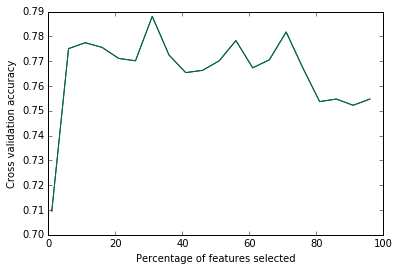

In [403]:
%%time
from sklearn import cross_validation
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
LR = LogisticRegression() 
SV = SVC()


percentiles = range(1, 100, 5)
results = []
results2 = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(LR, X_train_fs, y_train, cv=20)
    scores2 = cross_validation.cross_val_score(SV, X_train_fs, y_train, cv=20)
    print(i,' LR : ',scores.mean())
    print(i,' SVM :',scores2.mean())
    results = np.append(results, scores.mean())
    results2 = np.append(results2, scores.mean())
    
# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)
pl.plot(percentiles,results2)

> > From above figure of cross validation accuracy vs percentage of features selected for both SVM and LR, 71% of the features gives us the best performing models that fits our data though it took forever to run SVM since we have over 3390 features.

In [391]:
%%time
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=31)
df_X_train_fs = fs.fit_transform(X_train, y_train)

np.set_printoptions(suppress=True, precision=2, linewidth=80)
print(fs.get_support())
print(fs.scores_)
print('')

[False False False ..., False False False]
[ 0.01  0.    0.   ...,  0.1   0.08  0.95]

Wall time: 85.7 ms


> In the code above, we select 31% of the features in our training set based on Chi2 test.

In [397]:
#%%time
Chi2_Score = pd.DataFrame()

for i in range(len(df_X.columns.values)):
    if fs.get_support()[i]:
        #print(df_X.columns.values[i],'\t', fs.scores_[i] )
        Feature ={'Feature': df_X.columns.values[i], 'chi-squared':fs.scores_[i]}
        Chi2_Score =Chi2_Score.append(Feature, ignore_index=True)
Chi2_Score       

,Feature,chi-squared
0,local_perpupil_num,90.280231
1,total_expense_num,124.591269
2,Reading SPG Score,45.293129
3,Math Score,115.819749
4,Read Score,84.815191
5,SchoolWeightedScore,35.709018
6,SPG Score,80.969567
7,Math SPG Score,66.795962
8,The ACT Score,20.562560
9,English II Score,11.054753


Above table shows our selected features with their chi-squared score

In [409]:
%%time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dt = LogisticRegression( C=1, class_weight=None)

lencol = int(0.71*X_train.shape[1]) #count 71% of the columns
X_new = SelectKBest(chi2, k=lencol).fit_transform(X_train, y_train) #select the  best cols

scores = cross_validation.cross_val_score(dt, X_new, y_train, cv=30)

#values for 30 fold cross validation
print('20 fold cross validation score')
print('-------------------------------')
print(scores)
#average score
print('-------------------------------')
print('average score of the 20 fold cross validation')
print(scores.mean())


20 fold cross validation score
-------------------------------
[ 0.76  0.8   0.86  0.84  0.71  0.83  0.74  0.71  0.78  0.78  0.81  0.75  0.81
  0.77  0.83  0.77  0.8   0.64  0.86  0.77  0.84  0.75  0.78  0.78  0.79  0.81
  0.81  0.71  0.78  0.75]
-------------------------------
average score of the 20 fold cross validation
0.779926927293
Wall time: 1min 2s


A Logistics regression model trained and tested on the training with 71% of features selected based on the chi-square yields 78% accurancy as shown above 20 fold cross validation above. Below we train and test both SVM and Logits models using 71% of the features selected using Chi-squared. We will measure the time it take to train the models and the accruacy of the prediction on the testing set.

### SECTION 2 [10 Points]:

1. Discuss the advantages of each model for each classification task. 
2. Does one type of model offer superior performance over another in terms of prediction accuracy? 
3. In terms of training time or efficiency? Explain in detail.

### Model Training Time SVM vs Logits

#### 1. Logits

In [410]:
%%time
#Update x data to the selected columns from feature selection above
X_train_new = X_train[Chi2_Score.Feature]
X_test_new = X_test[Chi2_Score.Feature]

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logis= LogisticRegression() 
logis.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = logis.predict(X_test_new)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logis.score(X_test_new, y_test))) 


Accuracy of logistic regression classifier on test set: 0.8043
Wall time: 1.06 s


#### 2. SVM

In [411]:
%%time
#Update x data to the selected columns from feature selection above
X_train_new = X_train[Chi2_Score.Feature]
X_test_new = X_test[Chi2_Score.Feature]

from sklearn import metrics
from sklearn.svm import SVC
SV = SVC()
SV.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = SV.predict(X_test_new)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(SV.score(X_test_new, y_test))) 


Accuracy of logistic regression classifier on test set: 0.7287
Wall time: 10.3 s


LR
 - 

### SECTION 3 [30 Points]

1. Use the weights from logistic regression to interpret the importance of different features for the classification task. 
2. Explain your interpretation in detail. Why do you think some variables are more important?

### SECTION 4 [10 Points]

Look at the chosen support vectors for the classification task. 
1. Do these provide any insight into the data? Explain. 
2. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.